# Qual o próximo hit do Spotify?

## Introdução

Neste projeto, o objetivo é analisar e prever a popularidade de músicas utilizando um conjunto de dados que contém diversas características sonoras e informações sobre cada faixa. A análise envolverá a limpeza e tratamento dos dados, a exploração de padrões e tendências, e a construção de modelos preditivos que permitam entender quais fatores influenciam a popularidade de uma música.

A análise da popularidade de músicas é de grande importância tanto para artistas quanto para a indústria da música. Compreender o que torna uma música popular pode ajudar artistas a criar faixas mais impactantes, além de permitir que plataformas de streaming aprimorem suas recomendações e playlists. Este projeto visa fornecer insights valiosos sobre as características que podem contribuir para o sucesso de uma música, auxiliando na tomada de decisões estratégicas por parte dos profissionais do setor.


## Importação de Bibliotecas e Dados

Nesta seção, iremos importar as bibliotecas necessárias para a análise e carregar os conjuntos de dados de treinamento e teste.

Primeiro, importamos a biblioteca **pandas**, que será utilizada para manipulação e análise de dados. Em seguida, carregamos os arquivos CSV contendo os dados.


In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



In [527]:
# Carregar os datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Análise Inicial dos Dados

Vamos começar visualizando as primeiras linhas do conjunto de dados de treinamento e sua estrutura para entender sua estrutura e os dados que ele contém.


In [528]:
train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


O DataFrame `train_data` contém 79.800 entradas e 21 colunas, apresentando informações sobre faixas musicais.

In [529]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

### Descrição das Colunas

- **`track_id`**: ID único da música.
- **`artists`**: Artistas da música, separados por `;`.
- **`album_name`**: Nome do álbum.
- **`track_name`**: Nome da música.
- **`duration_ms`**: Duração da música em milissegundos.
- **`explicit`**: Indica conteúdo explícito (booleano).
- **`danceability`**: Quão dançável é a música (0.0 a 1.0).
- **`energy`**: Intensidade da música (0.0 a 1.0).
- **`key`**: Tonalidade musical.
- **`loudness`**: Volume da faixa em decibéis.
- **`mode`**: Modalidade (maior ou menor).
- **`speechiness`**: Presença de palavras faladas.
- **`acousticness`**: Indica se a faixa é acústica (0.0 a 1.0).
- **`instrumentalness`**: Se contém vocais (0.0 = vocais, 1.0 = instrumental).
- **`liveness`**: Presença de audiência na gravação.
- **`valence`**: Positividade da música (0.0 a 1.0).
- **`tempo`**: BPM da faixa.
- **`time_signature`**: Assinatura de tempo.
- **`track_genre`**: Gênero da música.
- **`popularity_target`**: Indica se a música é popular (booleano).

## Limpeza e Tratamento de Valores Nulos

### Identificar Valores Nulos

O primeiro passo é identificar se há valores nulos no DataFrame usando o método `isnull()` junto com `sum()` para contar os valores nulos em cada coluna.

In [530]:
# Verificando valores nulos em cada coluna
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


A saída indica que não há valores nulos no DataFrame. Dessa forma, o próximo passo é identificar e tratar outliers.

### Identificar outliers

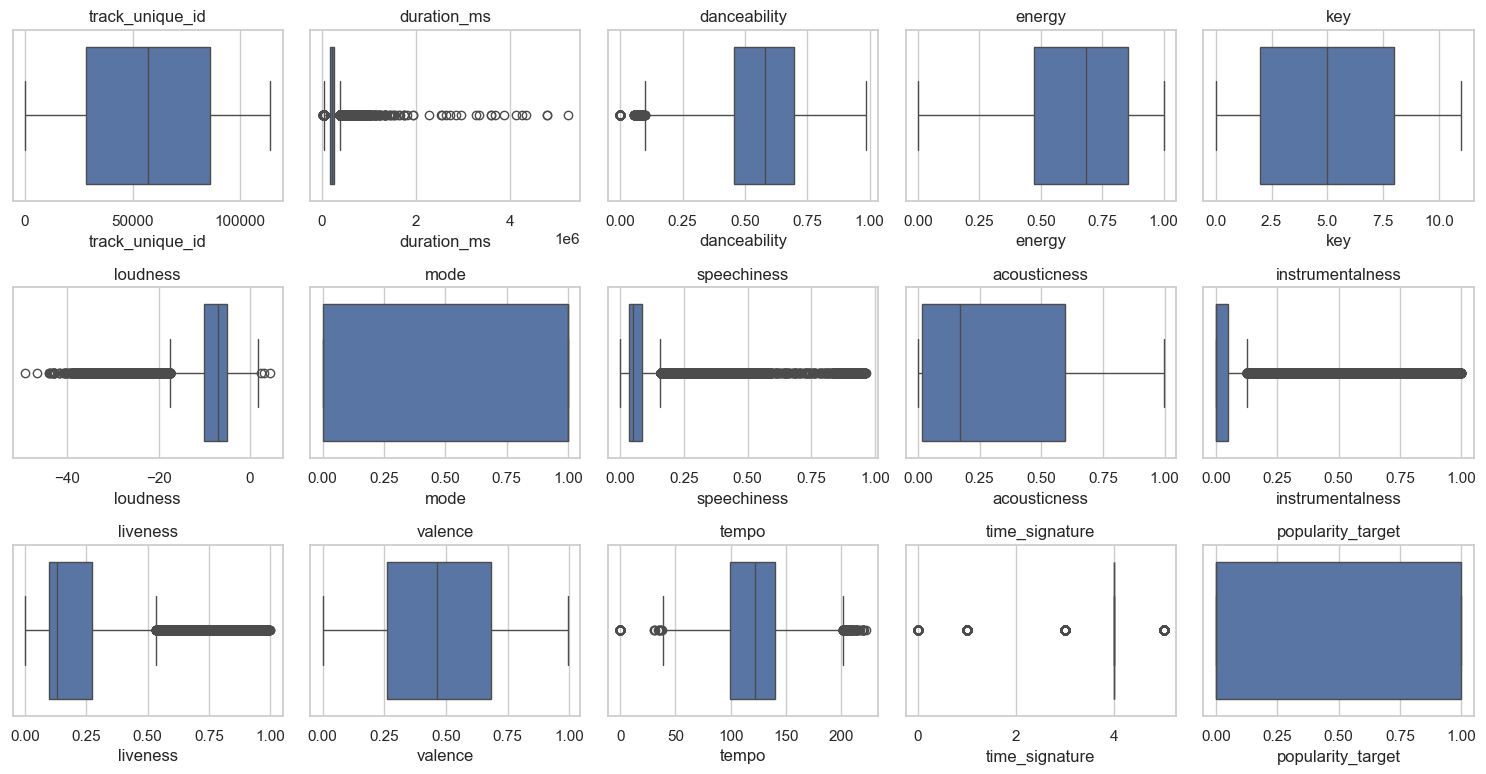

In [531]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Selecionando apenas as colunas numéricas
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Criando boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 5, i + 1)  # Organizando os gráficos em um grid 4x5
    sns.boxplot(x=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [532]:
from scipy import stats

# Dicionário para armazenar outliers
outliers_dict = {}

# Calculando Z-scores e identificando outliers para cada coluna numérica
for col in num_cols:
    z_scores = stats.zscore(train_data[col])
    threshold = 3
    outliers = train_data[(z_scores > threshold) | (z_scores < -threshold)]
    outliers_dict[col] = outliers

# Exibindo os outliers encontrados
for col, outliers in outliers_dict.items():
    print(f"Outliers identificados na coluna '{col}':")
    print(outliers[['track_unique_id', col]])
    print("\n" + "="*60 + "\n")


Outliers identificados na coluna 'track_unique_id':
Empty DataFrame
Columns: [track_unique_id, track_unique_id]
Index: []


Outliers identificados na coluna 'duration_ms':
       track_unique_id  duration_ms
86               22214       555933
223              54657      1664000
270              16547       583826
378              11729       587160
680              54138       559093
...                ...          ...
79414             5895       555007
79601            75766      1119960
79651           113252       599746
79704            23247       565041
79742            76552       599401

[699 rows x 2 columns]


Outliers identificados na coluna 'danceability':
       track_unique_id  danceability
437             101631           0.0
1016            101980           0.0
1748            101632           0.0
3633            101580           0.0
3868            101774           0.0
...                ...           ...
72735           101448           0.0
73807             4131   

Foram identificados vários outliers na coluna **`duration_ms`**, que representa a duração das faixas em milissegundos. Dessa forma, será mantido os outliers identificados na coluna **`duration_ms`** devido à sua relevância potencial na previsão do sucesso das músicas. A duração de uma faixa pode influenciar diretamente sua popularidade e aceitação pelo público, e essa variabilidade pode ser importante para capturar nuances no gosto do consumidor. Ao incluir esses valores extremos, temos a oportunidade de enriquecer nosso modelo preditivo e testar seu impacto na performance das previsões de popularidade.


### Verificação e Tratamento de Duplicatas

In [533]:
# Identificar duplicatas
duplicates = train_data.duplicated()

# Exibir o número de duplicatas encontradas
num_duplicates = duplicates.sum()
print(f"Número de linhas duplicadas: {num_duplicates}")

# Se desejar ver as duplicatas, você pode fazer
duplicates_df = train_data[duplicates]
print(duplicates_df)


Número de linhas duplicadas: 0
Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []

[0 rows x 21 columns]


Na etapa de identificação de duplicatas, foi aplicado o método `duplicated()` ao nosso conjunto de dados. A análise revelou que não há linhas duplicadas, com um total de **0 duplicatas** encontradas. Essa é uma boa notícia, pois a ausência de duplicatas indica que a integridade e a qualidade dos dados estão preservadas, evitando distorções nos resultados das análises e nos modelos preditivos.

Para fins de verificação, também tentamos visualizar as duplicatas através de um DataFrame, mas ele retornou vazio, confirmando que não existem entradas repetidas no conjunto de dados. Esse resultado é positivo, pois nos permite prosseguir para as próximas etapas de limpeza e análise sem preocupações relacionadas à duplicidade.


### Remoção de colunas desnecessárias

As colunas `track_id` e `track_name` serão removidas do conjunto de dados porque são identificadores únicos que não oferecem informações preditivas relevantes para o modelo. A presença dessas colunas poderia complicar a análise, sem contribuir para a previsão da popularidade das músicas, uma vez que o foco deve estar em características acústicas e metadados que realmente influenciam o sucesso. Assim, sua remoção ajuda a simplificar o modelo e a melhorar a eficácia das previsões.

In [534]:
train_data = train_data.drop(columns=['track_id', 'track_name'])
test_data = test_data.drop(columns=['track_id', 'track_name'])

Ao eliminar essas colunas dos dois DataFrames, o código ajuda a simplificar os dados e a concentrar-se nas características relevantes que podem influenciar a popularidade.

### Verificar Tipos de Colunas

Em algumas situações, mudar alguns tipos de colunas é essencial para garantir que o conjunto de dados seja compatível com modelos de machine learning e para facilitar a análise. 

In [535]:
# Verificar os tipos de colunas no DataFrame
column_types = train_data.dtypes
print("Tipos de Colunas:")
print(column_types)


Tipos de Colunas:
track_unique_id        int64
artists               object
album_name            object
duration_ms            int64
explicit                bool
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature         int64
track_genre           object
popularity_target      int64
dtype: object


A interpretação da saída revela que a coluna `explicit`, atualmente do tipo booleano, pode ser transformada em um tipo inteiro, onde `1` representa a presença de conteúdo explícito e `0` a ausência. Além disso, a coluna `artists` e `album_name`, que são do tipo `object`, podem ser convertidas para categorias, melhorando a eficiência do processamento. Essa transformação permite que todas as colunas sejam manipuladas de forma mais eficiente, contribuindo para a precisão dos modelos preditivos e simplificando a análise estatística dos dados.


In [536]:
# Transformar a coluna 'explicit' de bool para int (0 e 1)
train_data['explicit'] = train_data['explicit'].astype(int)

# Verificar a transformação
print("Tipos de Colunas Após a Transformação:")
print(train_data.dtypes)

Tipos de Colunas Após a Transformação:
track_unique_id        int64
artists               object
album_name            object
duration_ms            int64
explicit               int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature         int64
track_genre           object
popularity_target      int64
dtype: object


### Codificação de Variáveis Categóricas

Para transformar variáveis categóricas em formatos que possam ser utilizados por algoritmos de machine learning, aplicamos **Label Encoding**. Esse método converte cada categoria em um valor numérico, permitindo que os modelos processem essas informações. No caso deste dataset, as colunas categóricas identificadas foram `artists`, `album_name` e `track_genre`, que foram convertidas em novas colunas codificadas.

O código utilizado inicializa o **LabelEncoder** da biblioteca `sklearn` e aplica a codificação para essas colunas categóricas, criando novas colunas chamadas `artists_encoded`, `album_name_encoded` e `track_genre_encoded`. Após a codificação, as colunas categóricas originais foram removidas para evitar redundâncias. 

Esse processo garante que as variáveis categóricas sejam adequadamente transformadas, permitindo que algoritmos de machine learning, como **Random Forest**, utilizem essas informações sem perda de conteúdo essencial.


In [537]:
# Concatenar os conjuntos de treinamento e teste
combined_data = pd.concat([train_data, test_data], keys=['train', 'test'])

# Inicializando um dicionário para armazenar os encoders
label_encoders = {}

# Colunas categóricas que você deseja codificar
categorical_cols = ['artists', 'album_name', 'track_genre']

# Aplicando Label Encoding para as colunas categóricas
for col in categorical_cols:
    # Preencher valores ausentes com 'Unknown'
    combined_data[col] = combined_data[col].fillna('Unknown')
    
    # Criar e ajustar o LabelEncoder para cada coluna
    le = LabelEncoder()
    combined_data[f'{col}_encoded'] = le.fit_transform(combined_data[col])
    
    # Armazenar o encoder no dicionário
    label_encoders[col] = le

# Separar os conjuntos de volta
train_data = combined_data.xs('train')
test_data = combined_data.xs('test')

# Agora, podemos remover as colunas categóricas originais
train_data.drop(categorical_cols, axis=1, inplace=True)
test_data.drop(categorical_cols, axis=1, inplace=True)

# Exibir as primeiras linhas dos conjuntos de dados processados
print("Conjunto de Treinamento Processado:")
print(train_data.head())

print("\nConjunto de Teste Processado:")
print(test_data.head())

Conjunto de Treinamento Processado:
   track_unique_id  duration_ms  explicit  danceability  energy  key  \
0            41996       211533         0         0.305  0.8490    9   
1            76471       196000         0         0.287  0.1900    7   
2            54809       216506         0         0.583  0.5090    1   
3            16326       218346         0         0.163  0.0368    8   
4           109799       173160         0         0.647  0.9210    2   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   -10.795     1       0.0549      0.000058          0.056700    0.4640   
1   -12.030     0       0.0370      0.930000          0.000356    0.0834   
2    -9.661     1       0.0362      0.777000          0.202000    0.1150   
3   -23.149     1       0.0472      0.991000          0.899000    0.1070   
4    -7.294     1       0.1850      0.000939          0.371000    0.1310   

   valence    tempo  time_signature  popularity_target  artists_encoded  \

C:\Users\Inteli\AppData\Local\Temp\ipykernel_55984\2274445614.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(categorical_cols, axis=1, inplace=True)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_55984\2274445614.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(categorical_cols, axis=1, inplace=True)


### Exploração e Visualização dos Dados

In [538]:
print(train_data.describe())

       track_unique_id   duration_ms      explicit  danceability  \
count     79800.000000  7.980000e+04  79800.000000  79800.000000   
mean      57140.494048  2.279022e+05      0.085689      0.567318   
std       32993.196225  1.050599e+05      0.279906      0.173110   
min           0.000000  1.338600e+04      0.000000      0.000000   
25%       28450.500000  1.744360e+05      0.000000      0.456000   
50%       57234.000000  2.128130e+05      0.000000      0.581000   
75%       85774.250000  2.614260e+05      0.000000      0.695000   
max      113998.000000  5.237295e+06      1.000000      0.985000   

             energy           key      loudness          mode   speechiness  \
count  79800.000000  79800.000000  79800.000000  79800.000000  79800.000000   
mean       0.641529      5.307043     -8.263741      0.637732      0.084750   
std        0.251441      3.562186      5.035504      0.480659      0.105657   
min        0.000019      0.000000    -49.307000      0.000000      0.00

O conjunto de dados apresenta informações sobre músicas, incluindo variáveis como `duration_ms`, com uma média de 3,8 minutos e possíveis outliers em faixas muito curtas ou longas. A variável `explicit` mostra que 8,5% das faixas contêm conteúdo explícito. Métricas de música como `danceability` (média de 0,567) e `energy` (0,641) indicam que as faixas são, em média, moderadamente dançáveis e energéticas. O tom musical (`key`) é bem distribuído entre os 12 tons, enquanto o volume (`loudness`) varia de -49 dB a 4,5 dB, com uma média de -8,26 dB, podendo conter outliers que necessitam de análise adicional.

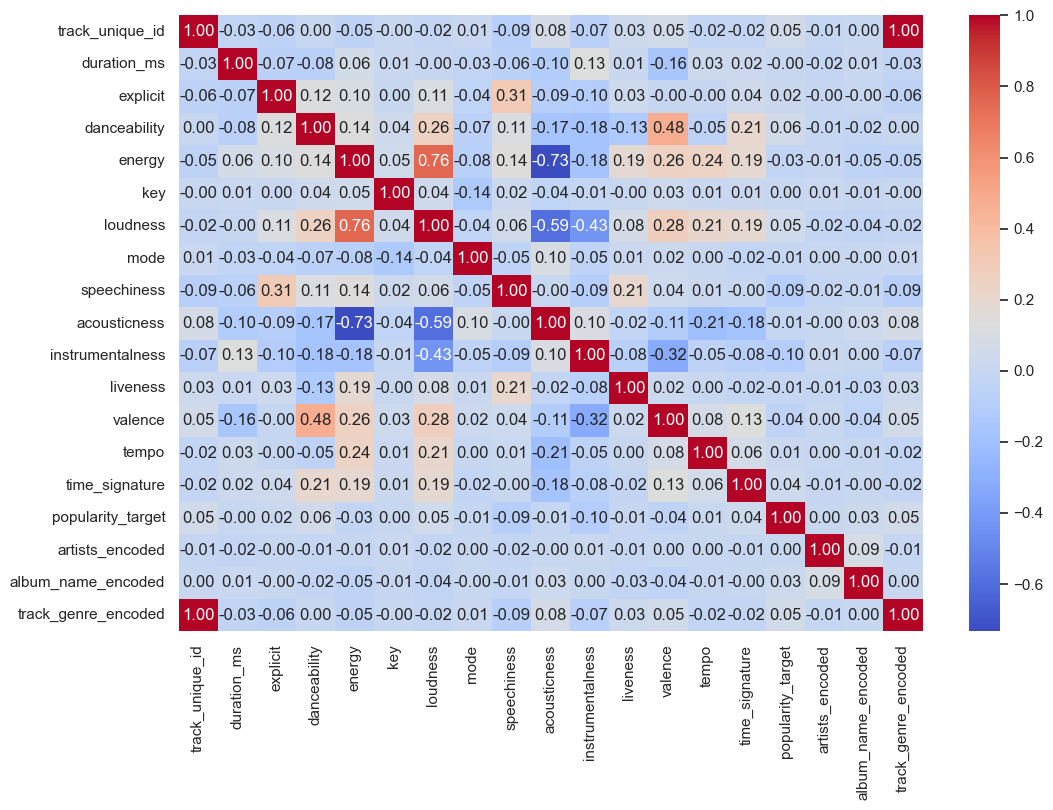

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = train_data.corr()

# Visualizando a matriz de correlação com um heatmap, formatando com 2 casas decimais
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# Análise de Correlação das Variáveis

Nesta seção, foi analisado a correlação entre as variáveis do conjunto de dados, focando nas relações mais significativas que podem impactar a modelagem preditiva. As correlações foram extraídas da matriz de correlação e algumas observações importantes incluem:

1. **Valence e Danceability (0.48)**:
   - Existe uma correlação positiva moderada entre a valência e a dançabilidade das faixas. Isso indica que, à medida que a valência aumenta (que mede a positividade ou negatividade de uma faixa), a dançabilidade também tende a aumentar. Isso pode sugerir que músicas mais alegres são geralmente mais adequadas para dançar.

2. **Loudness e Energy (0.76)**:
   - A correlação entre loudness (volume) e energia é bastante forte e positiva. Isso sugere que faixas com maior volume tendem a ter uma maior sensação de energia. Este resultado pode ser útil para identificar características de músicas que são mais energéticas e potencialmente mais populares em ambientes festivos ou de dança.

3. **Loudness e Danceability (0.26)**:
   - A correlação entre loudness e danceability é positiva, embora mais fraca. Isso sugere que existe uma relação, mas não tão robusta quanto entre loudness e energia. Isso indica que, embora músicas mais altas possam ser dançáveis, outros fatores também influenciam a dançabilidade.

4. **Explicit e Speechiness (0.31)**:
   - A correlação positiva moderada entre a variável explícita (que indica se uma faixa contém conteúdo explícito) e a fala (speechiness) sugere que músicas com mais conteúdo explícito tendem a ter mais partes faladas ou vocais. Essa relação pode ser relevante ao considerar o conteúdo e o estilo das faixas em um contexto mais amplo.


               Variable  Correlation with Popularity
0       track_unique_id                     0.053868
1              explicit                     0.016312
2          danceability                     0.057848
3                   key                     0.004285
4              loudness                     0.048140
5                 tempo                     0.012839
6        time_signature                     0.036454
7     popularity_target                     1.000000
8       artists_encoded                     0.000682
9    album_name_encoded                     0.026464
10  track_genre_encoded                     0.054439


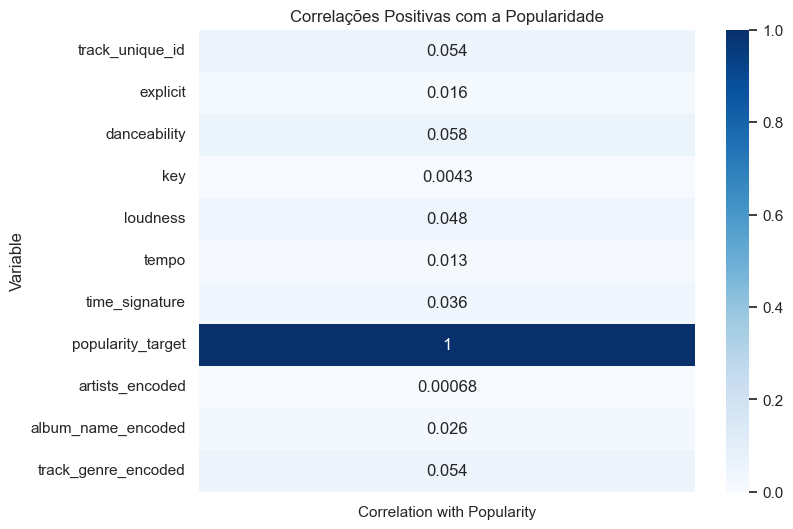

In [540]:
# Calculando a matriz de correlação
correlation_matrix = train_data.corr()

# Selecionando apenas as correlações positivas com a popularidade
positive_correlations = correlation_matrix['popularity_target'][correlation_matrix['popularity_target'] > 0]

# Criando um DataFrame para visualizar as correlações positivas
positive_correlations_df = positive_correlations.reset_index()
positive_correlations_df.columns = ['Variable', 'Correlation with Popularity']

# Exibindo as correlações positivas
print(positive_correlations_df)

# Visualizando as correlações positivas com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(positive_correlations_df.set_index('Variable'), annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Correlações Positivas com a Popularidade')
plt.show()


### Interpretação da Correlação com a Popularidade

A tabela apresenta as correlações positivas entre várias variáveis e a variável de popularidade das músicas (`popularity_target`). Foram selecionadas apenas as variáveis com correlação superior a 0, e aqui estão as interpretações:

1. **Track Unique ID (0.053)**: A correlação entre o identificador único da faixa e a popularidade é baixa, mas ainda assim positiva.

2. **Explicit (0.016)**: A presença de músicas explícitas mostra uma correlação muito leve com a popularidade, indicando que, embora não seja um fator preponderante, pode haver uma leve influência.

3. **Danceability (0.058)**: A dança apresenta a correlação mais alta dentre as variáveis analisadas, sugerindo que músicas mais dançantes tendem a ser um pouco mais populares, mesmo que a correlação ainda seja considerada baixa.

4. **Key (0.004)**: A tonalidade das músicas tem uma correlação quase nula com a popularidade, indicando que a chave musical não impacta significativamente a popularidade.

5. **Loudness (0.048)**: A intensidade sonora tem uma correlação leve com a popularidade. Músicas mais altas parecem ter uma influência sutil, mas ainda não substancial.

6. **Tempo (0.013)**: O tempo da música também apresenta uma correlação baixa com a popularidade, indicando que o ritmo não é um fator determinante.

7. **Time Signature (0.036)**: A métrica musical mostra uma correlação leve, sugerindo que a estrutura rítmica da música pode ter uma influência marginal sobre sua popularidade.

8. **Popularity Target (1.000)**: Esta é a correlação perfeita, pois a variável é comparada consigo mesma.

9. **Artists Encoded (0.001)**: A codificação dos artistas apresenta uma correlação praticamente nula com a popularidade, indicando que o artista em si não é um fator relevante na popularidade da música dentro deste conjunto de dados.

10. **Album Name Encoded (0.026)**: A codificação dos nomes dos álbuns mostra uma leve correlação com a popularidade, mas ainda é bastante fraca.

11. **Track Genre Encoded (0.054)**: A codificação do gênero musical tem uma correlação levemente positiva com a popularidade, sugerindo que o gênero pode ter alguma influência, embora a correlação seja baixa.

Entre as variáveis analisadas, a **dançabilidade** se destaca como a que apresenta a maior correlação com a popularidade, sugerindo que é um fator relevante a ser considerado.


### Hipóteses sobre Fatores que Influenciam a Popularidade de uma Música

#### Hipótese 1: A Dançabilidade Aumenta a Popularidade

Músicas com maior dançabilidade têm maior probabilidade de se tornarem populares.
A dançabilidade é um fator relevante em gêneros musicais voltados para festas e entretenimento, como pop, dance e funk. A capacidade de uma música fazer com que as pessoas queiram dançar pode levar a um maior engajamento em festas, eventos sociais e plataformas de streaming, resultando em uma maior popularidade. Além disso, músicas dançantes podem ser mais compartilhadas e tocadas em rádios, contribuindo para sua disseminação e aceitação.

#### Hipótese 2: A Intensidade Sonora Aumenta a Atração do Público

Músicas que apresentam maior loudness (intensidade sonora) tendem a ser mais populares entre os ouvintes.
Músicas mais altas podem criar uma experiência auditiva mais envolvente e enérgica, especialmente em ambientes onde a música é um elemento central, como festas e shows ao vivo. Essa intensidade sonora pode captar a atenção dos ouvintes, fazendo com que a música se destaque em playlists e em eventos sociais. Além disso, músicas mais altas podem gerar uma sensação de euforia e emoção, que são frequentemente associadas à popularidade.

#### Hipótese 3: O Gênero Musical Influencia as Preferências do Público

O gênero musical de uma faixa tem um impacto significativo na sua popularidade, com determinados gêneros atraindo mais ouvintes em períodos específicos.
Os gostos musicais dos ouvintes podem variar de acordo com tendências culturais e sociais, e certos gêneros podem estar mais alinhados com o que está em alta em um determinado momento. Por exemplo, durante períodos em que gêneros como pop ou hip-hop estão em destaque nas paradas de sucesso, músicas nesses estilos podem ter uma maior probabilidade de se tornarem populares. A codificação do gênero musical pode ajudar a capturar essas dinâmicas e explicar variações na popularidade.

### Seleção de Features para o Modelo

Com base na análise exploratória e nas hipóteses formuladas, as seguintes features foram identificadas como mais relevantes para o modelo preditivo da popularidade das músicas:

Danceability: A dançabilidade foi identificada como a variável com a maior correlação positiva em relação à popularidade. Isso sugere que músicas que são mais dançantes tendem a ser um pouco mais populares. A capacidade de uma música ser dançada pode ser um indicador importante do seu apelo geral, especialmente em gêneros musicais voltados para festas e entretenimento.

Loudness: A intensidade sonora, ou loudness, também apresenta uma correlação positiva com a popularidade, indicando que músicas mais altas podem ter um apelo maior. Músicas com um volume mais elevado podem atrair mais atenção e serem mais impactantes, especialmente em ambientes sociais ou de festa, onde a música é uma parte central da experiência.

Track Genre Encoded: A codificação do gênero musical mostra uma leve correlação positiva com a popularidade. O gênero pode influenciar as preferências do público e a recepção das músicas. Por exemplo, certos gêneros podem ser mais populares em determinadas épocas ou entre grupos demográficos específicos, tornando esta feature relevante para entender as tendências de popularidade.

Time Signature: Embora a métrica musical tenha uma correlação leve com a popularidade, sua inclusão é justificada pela sua potencial influência na estrutura rítmica das músicas. A forma como uma música é estruturada em termos de batidas pode afetar como as pessoas a percebem e respondem a ela, especialmente em gêneros onde o ritmo é fundamental para o envolvimento do ouvinte.

Essas variáveis formarão a base para a construção do modelo preditivo, permitindo uma análise mais aprofundada sobre os fatores que realmente influenciam a popularidade das faixas analisadas.


## Construção do Modelo

Nesta seção, o modelo de aprendizado de máquina escolhido para prever a popularidade das músicas é o **Random Forest Classifier**. Esse algoritmo é eficaz para classificação, pois utiliza múltiplas árvores de decisão, oferecendo robustez contra overfitting e a capacidade de capturar relações não lineares nas variáveis. A facilidade de uso e a avaliação da importância das features tornam o Random Forest uma escolha apropriada para este problema.

O modelo foi construído selecionando features relevantes, como `danceability`, `loudness`, `track_genre_encoded`, `time_signature` e `duration_ms`. A adição da feature `duration_ms` foi motivada pela alta variabilidade observada em seus valores, que poderia impactar a popularidade das músicas. Os dados foram divididos em conjuntos de treinamento e validação, e o modelo foi treinado com o código apropriado, garantindo que ele aprendesse a partir dos dados disponíveis para prever a popularidade.

Para avaliar o desempenho do modelo, foram utilizadas métricas como acurácia, precisão, recall e F1-score. Essas métricas permitem uma compreensão abrangente da eficácia do modelo, oferecendo insights sobre sua capacidade de classificar corretamente as músicas e equilibrar precisão e detecção das classes. Os resultados indicaram que o Random Forest Classifier é uma abordagem promissora para este tipo de previsão, refletindo a utilidade das features selecionadas, incluindo a nova variável adicionada.


In [541]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Selecionar apenas as features relevantes
selected_features = ['danceability', 'loudness', 'track_genre_encoded', 'time_signature', 'duration_ms']
X = train_data[selected_features]
y = train_data['popularity_target']

# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avaliar o desempenho do modelo
print("Acurácia:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Selecionar as mesmas features do conjunto de teste
X_test = test_data[selected_features]

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Criar o DataFrame de submissão
submission = pd.DataFrame({
    'track_unique_id': test_data['track_unique_id'], 
    'popularity_target': predictions.astype(int)  # Convertendo as previsões para int
})

# Salvar o arquivo de submissão
submission.to_csv('submissao_isa.csv', index=False)

print("Arquivo submissao_isa.csv criado com sucesso!")


Acurácia: 0.7852756892230577
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      8247
         1.0       0.78      0.77      0.78      7713

    accuracy                           0.79     15960
   macro avg       0.79      0.78      0.78     15960
weighted avg       0.79      0.79      0.79     15960

Arquivo submissao_isa.csv criado com sucesso!


## Conclusão

O modelo Random Forest Classifier demonstrou um desempenho sólido na previsão da popularidade das músicas, alcançando uma acurácia de aproximadamente 78.53%. As métricas de avaliação, incluindo precisão e recall, foram consistentes entre as classes, refletindo a capacidade do modelo em distinguir entre músicas populares e menos populares. A precisão para a classe 0 (não popular) foi de 79%, enquanto a classe 1 (popular) apresentou uma precisão de 78%, indicando que o modelo está bem equilibrado na detecção de ambas as classes.

Além disso, o F1-score, que considera tanto a precisão quanto o recall, foi de 0.79 para a classe 0 e 0.78 para a classe 1, evidenciando um desempenho satisfatório em termos de classificação. Essas métricas são cruciais, especialmente em contextos onde a identificação correta de músicas populares pode influenciar decisões de marketing e playlists.

Por fim, a criação do arquivo `submissao_isa.csv` com as previsões reforça a aplicabilidade do modelo em cenários práticos. Os resultados obtidos indicam que, com ajustes adicionais e a inclusão de mais dados ou features, o desempenho do modelo pode ser ainda mais aprimorado, potencializando sua eficácia na previsão da popularidade musical.
